In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
np.random.seed(550)
m = 1
C = 3
dt = 0.1
step = 300
niter  = 50
# noise in the gradient
sigma = 0.5

gradUPerfect = lambda x: x
gradU = lambda x: x + np.random.randn(1) * sigma

x0 = np.ones((1, 1))
p0 = np.zeros((1, 1))

In [3]:
# Second order Langevin dynamics with noised gradient
np.random.seed(550)
x = x0
p = p0
xs = np.zeros((step, 1))
ys = np.zeros((step, 1))
Bhat = 0.5 * np.power(sigma, 2) * dt
D = np.sqrt(2 * (C - Bhat) * dt)
for i in range(step):
    for j in range(niter):
        p = p - gradU(x) * dt - p * C * dt + np.random.randn(1) * D
        x = x + p/m * dt
    xs[i] = x
    ys[i] = p
    
x1, y1 = xs, ys

In [7]:
def hamilton(x0,p0,grad,m =1, dt = 0.1,step = 300, niter= 50,r = 'wo'):
    np.random.seed(550)
    x = x0
    p = p0
    xs = np.zeros((step, 1))
    ys = np.zeros((step, 1))
    if r == 'wo':
        for i in range(step):
            for j in range(niter):
                p = p - grad(x) * dt/2
                x = x + p/m * dt
                p = p - grad(x) * dt/2
            xs[i] = x
            ys[i] = p
    else:
        for i in range(step):
            p = np.random.randn(len(x)) * np.sqrt(m)
            for j in range(niter):
                p = p - grad(x) * dt/2
                x = x + p/m * dt
                p = p - grad(x) * dt/2
            xs[i] = x
            ys[i] = p
        
    return xs, ys


In [8]:
x2,y2 = hamilton(x0,p0,grad = gradU)
x4,y4 = hamilton(x0,p0,grad = gradUPerfect)
x3,y3 = hamilton(x0,p0,grad = gradU, r = 'w')

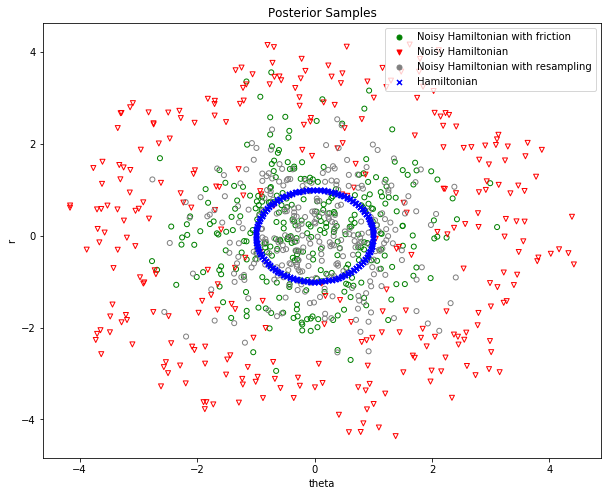

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x1, y1,c='',edgecolors= 'green',s=25,
           cmap='Greens',marker='o',
           label='Noisy Hamiltonian with friction')
ax.scatter(x2, y2,c='',edgecolors='red',s=25,
           cmap='Reds',marker='v',
           label='Noisy Hamiltonian')
ax.scatter(x3, y3,c='',edgecolors='grey',s=25,
           cmap='Greys',marker='o',
           label='Noisy Hamiltonian with resampling')
ax.scatter(x4, y4,c='blue',s=25,
           cmap='Blues',marker='x',
           label='Hamiltonian')
ax.set_title("Posterior Samples")
ax.set_ylabel("r")
ax.set_xlabel("theta")

leg = ax.legend(loc='upper right')
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('red')
leg.legendHandles[2].set_color('grey')
leg.legendHandles[3].set_color('blue')
fig.savefig('posterior_samples.pdf')